# DecisionTreeClassifier - using make_moons dataset

In [1]:
# Lets start by importing the necessary libraries and data structures.

# the dataset we'll be using for our model is the moons dataset
from sklearn.datasets import make_moons

# Import libraries needed for this project
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import the DecisionTreeClassifier from sklearn.tree & GridSearchCV from sklearn.model_selection.

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Loading/viewing the dataset to see shape etc.

data = make_moons()
dataset = pd.DataFrame(data[0]) # data[0] is the data
dataset

,0,1
0,1.761446,-0.148228
1,0.481607,-0.355143
2,0.967948,-0.499486
3,0.345365,0.938468
4,-0.284528,0.958668
...,...,...
95,-0.981559,0.191159
96,-0.222521,0.974928
97,-0.801414,0.598111
98,0.595217,-0.414413


In [3]:
# Let's import the module train_test_split().

from sklearn.model_selection import train_test_split

# Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).
# Here we'll also split the dataset into a training set and a test set using train_test_split().

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
# Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a 
# DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_estimator_


Fitting 3 folds for each of 294 candidates, totalling 882 fits


DecisionTreeClassifier(max_leaf_nodes=24, random_state=42)

In [5]:
# Lets import the DecisionTreeClassifier Model from the library here
# We will add the classifier to the model and then fit the model to the training data.

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, class_weight=None, criterion='gini', max_leaf_nodes=24, random_state=42)
clf = clf.fit(X_train, y_train)

In [6]:
# Checking the model default paremeters. In the above cell we could use 
# max_leaf_nodes = 50, min_samples_split = 2.
# or max_depth to control the tree depth, we'll use default params for now.

clf.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 24,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [7]:
# Here we'll check the predictions on the test set that the model predicts
# rather than the answers that we give it. 
# Represented by 1 and 0.

predictions = clf.predict(X_test)
predictions

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [8]:
# Lets view the models predictions

X_test

array([[ 0.69945888, -0.8734481 ],
       [ 1.7764418 ,  0.13222334],
       [-1.14450821,  0.24446319],
       ...,
       [ 2.26645104, -0.21310316],
       [ 0.71579141,  0.05925783],
       [-0.59614597,  1.16168672]])

In [9]:
# Here we can see the probability of the model however, 
# if we add max_depth=4 in the clf = DecisionTreeClassifier() parameters above, 
# then the model is less sure about the predictions because we have stopped it growing 
# so for now we'll stick with this for our purposes.

clf.predict_proba(X_test)

array([[0.07766522, 0.92233478],
       [0.30481283, 0.69518717],
       [0.88755981, 0.11244019],
       ...,
       [0.07766522, 0.92233478],
       [0.30481283, 0.69518717],
       [0.86934491, 0.13065509]])

In [10]:
from sklearn.tree import export_text

# Lets view the decision tree on the test dataset
model = DecisionTreeClassifier().fit(X_test, y_test)
print (model, "\n")

# Visualise the model tree
tree = export_text(model)
print(tree)

DecisionTreeClassifier() 

|--- feature_1 <= 0.25
|   |--- feature_0 <= -0.47
|   |   |--- feature_0 <= -0.66
|   |   |   |--- feature_1 <= -0.91
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  -0.91
|   |   |   |   |--- feature_1 <= 0.25
|   |   |   |   |   |--- feature_0 <= -0.79
|   |   |   |   |   |   |--- feature_1 <= 0.13
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  0.13
|   |   |   |   |   |   |   |--- feature_1 <= 0.13
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_1 >  0.13
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  -0.79
|   |   |   |   |   |   |--- feature_0 <= -0.78
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  -0.78
|   |   |   |   |   |   |   |--- feature_1 <= 0.13
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  0.13
|   |   |   |   |   |   |   |   |--- feature_

In [11]:
# Now lets import metrics to predict accuracy of our model.
from sklearn.metrics import accuracy_score

predictions = grid_search_cv.predict(X_test)
accuracy_score(y_test, predictions)

0.8636363636363636

In [12]:
# Lets look at the confusion_matrix of our test dataset to see how our model is
# performing in terms of classification.

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions, labels=[0, 1])

array([[1456,  224],
       [ 226, 1394]], dtype=int64)

In [13]:
# Now lets predict and print the results for overall precision and recall values for our model.
# We'll plot these values to see later on (see the next 2 cells).

from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.861557478368356
Overall Recall: 0.8604938271604938


In [14]:
# Making our pipeline to use with the precision recall display
# we'll use the binary predictions of our model and create our pipeline.

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

classifier = make_pipeline(StandardScaler(), LinearSVC(random_state=42))
classifier.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=42))])

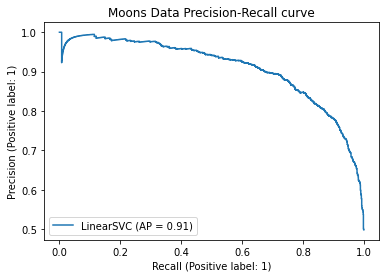

In [15]:
# As we already have our probabilities, we can visualise the precision recall curve using from_predictions method.
# if we didn't have them, we could use from_estimator and add the classifier parameter from the 
# classifier pipeline to the display method.

from sklearn.metrics import PrecisionRecallDisplay

y_score = classifier.decision_function(X_test)

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="LinearSVC"
)
_ = display.ax_.set_title("Moons Data Precision-Recall curve")

In [16]:
# Lets use the classification report to see how our model is performing.

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1680
           1       0.86      0.86      0.86      1620

    accuracy                           0.86      3300
   macro avg       0.86      0.86      0.86      3300
weighted avg       0.86      0.86      0.86      3300



In [17]:
# Evaluate the model MSE using the test data

mse = mean_squared_error(y_test, predictions)   # Mean Squared Error
print("MSE:", mse)

MSE: 0.13636363636363635


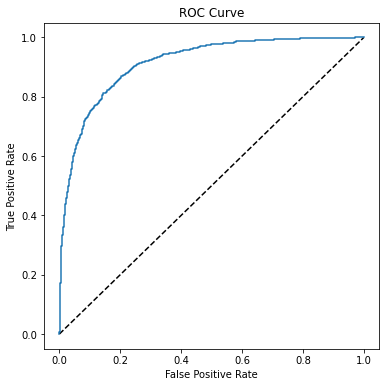

In [18]:
# Lets plot the ROC curve using the test data
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline


# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# plot ROC curve
fig = plt.figure(figsize=(6, 6))

# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')

# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The ROC chart above shows the curve of the true and false positive rates for different threshold values between 0 and 1.
 
A perfect classifier would have a curve that goes straight up the left side and straight across the top. 

The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction;
 
Obviously we want the curve to be higher than that (or our model is just simply guessing!).

In [19]:
# The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. 
# The closer to 1 this value is, the better the model, implement scikit-Learn function to calculate this metric.

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_score)
print('AUC: ' + str(auc))

AUC: 0.914241255144033


# SVM - using make_moons dataset

In [20]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 17 10:21:48 2022
@credits: https://github.com/ageron/handson-ml/blob/master/05_support_vector_machines.ipynb
"""
# Train an SVM classifier on the make_moons dataset. Since SVM classifiers are binary classifiers, 
# you will need to use one-versus-all to classifyall 10 digits. # You may want to tune the hyperparameters using small 
# validation sets to speed up the process. What accuracy can you reach? First, let's load the dataset and split it 
# into a training set and a test set. 

# To support both python 2 and python 3

# Common imports
import numpy as np

# to make this notebook's output stable across runs np.random.seed(42)
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)


import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [21]:
# Split it into a training set and a test set using train_test_split().

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
# Let's start simple, with a linear SVM classifier. It will automatically use the One-vs-All 
# (also called One-vs-the-Rest, OvR) strategy, so there's nothing special we need to do. Easy!

lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

LinearSVC(random_state=42)

In [23]:
# Let's make predictions on the training set and measure the accuracy 
# (we don't want to measure it on the test set yet, since we have not selected and trained the final model yet):

from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)


0.832089552238806

In [24]:
# 83% accuracy on make_moons is a really bad performance. 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.8319402985074626

In [25]:
# If we want to use an SVM, we will have to use a kernel. Let's try an SVC with an RBF kernel (the default).

# Warning: if you are using Scikit-Learn ≤ 0.19, the SVC class will use the One-vs-One (OvO) strategy by default,
# so you must explicitly setdecision_function_shape="ovr" if you want to use the OvR strategy instead (OvR is the default since 0.19).

svm_clf = SVC(decision_function_shape="ovr", gamma="auto")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

# check if you have got better accuracy now 


0.8637313432835821

In [26]:
# Let's tune the hyperparameters by doing a randomized search with cross validation. 
# We will do this on a small dataset just to speed up the process:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])
rnd_search_cv.best_estimator_
rnd_search_cv.best_score_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...C=1.5389902223899845, gamma=0.005163734103724241; total time=   0.0s
[CV] END ...C=1.5389902223899845, gamma=0.005163734103724241; total time=   0.0s
[CV] END ...C=1.5389902223899845, gamma=0.005163734103724241; total time=   0.0s
[CV] END ...C=7.618367639386253, gamma=0.0019871205992705405; total time=   0.0s
[CV] END ...C=7.618367639386253, gamma=0.0019871205992705405; total time=   0.0s
[CV] END ...C=7.618367639386253, gamma=0.0019871205992705405; total time=   0.0s
[CV] END ...C=2.119094047586323, gamma=0.0028095780159400037; total time=   0.0s
[CV] END ...C=2.119094047586323, gamma=0.0028095780159400037; total time=   0.0s
[CV] END ...C=2.119094047586323, gamma=0.0028095780159400037; total time=   0.0s
[CV] END ....C=6.445729101720833, gamma=0.014921937819165058; total time=   0.0s
[CV] END ....C=6.445729101720833, gamma=0.014921937819165058; total time=   0.0s
[CV] END ....C=6.445729101720833, gamma=0.014921

0.8330336324348301

In [27]:
# This looks pretty low but remember we only trained the model on 1,000 instances. Let's retrain the 
# best estimator on the whole training set and measure its accuracy on the test set:
 
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)



0.8482089552238806

In [28]:
# 85% accuracy this still looks poor! Let's select this model. Now we can test it on the test set:
 
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

# Not too bad, but the model is overfitting slightly. It's tempting to tweak the 
# hyperparameters a bit more (e.g. decreasing C and/or gamma), but we would run the risk of overfitting the test set. 
# Other people have found that the hyperparameters C=5 and gamma=0.005 yield even better performance (over 98% accuracy). 
# By running the randomized search for longer and on a larger part of the training set, you may be able to find this as well

0.8475757575757575

In [29]:
# Train the model
model = rnd_search_cv.best_estimator_
print (model, "\n")


SVC(C=5.002862619864761, gamma=0.038340160351732766) 



In [30]:
# Evaluate the model using the test data

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)

print("MSE:", mse)

MSE: 0.16636363636363635


In [31]:
# Lets look at the confusion_matrix of our test dataset to see how our model is
# performing in terms of classification.

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions, labels=[0, 1])

array([[1369,  311],
       [ 238, 1382]], dtype=int64)

In [32]:
y_scores = model.decision_function(X_test_scaled)
print(y_scores)

[ 2.20105659  1.16555479 -1.60260757 ...  2.03826885  0.55758813
 -1.75872039]


In [33]:
# Now lets predict overall precision and recall values for our model.

from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.8163024217365623
Overall Recall: 0.8530864197530864


In [34]:
# Making our pipeline to use with the precision recall display
# we'll use the binary predictions of our model and create our pipeline.

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

classifier = make_pipeline(StandardScaler(), LinearSVC(random_state=42))
classifier.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=42))])

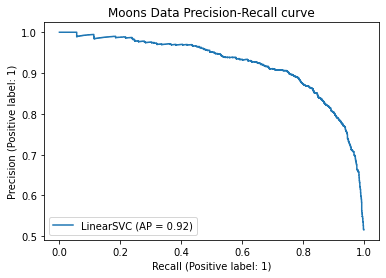

In [35]:
# As we already have our probabilities, we can visualise the precision recall curve using from_predictions method.
# if we didn't have them, we could use from_estimator and add the classifier parameter from the 
# classifier pipeline to the display method.

from sklearn.metrics import PrecisionRecallDisplay

y_score = classifier.decision_function(X_test)

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_scores, name="LinearSVC"
)
_ = display.ax_.set_title("Moons Data Precision-Recall curve")

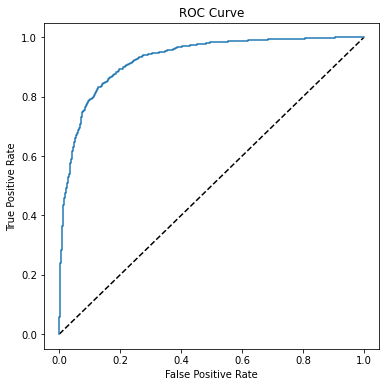

In [36]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# plot ROC curve
fig = plt.figure(figsize=(6, 6))

# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')

# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()

In [37]:
# The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. 
# The closer to 1 this value is, the better the model, implement scikit-Learn function to calculate this metric.

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_scores)
print('AUC: ' + str(auc))

AUC: 0.9268937389770724
